# Research Assignment 5 


Emily Ernst

How Wildifires Shape Health Outcomes Across Race in California

04/13/2024

In [1]:
// Setting up Data: Upload 
// CDC NEPHT Asthma Rates- Hospitalizations for Asthma Age-adjusted Rate of Hospitalizations for Asthma per ///
// 10,000 Population

import delimited using "/Users/emilyernst/Desktop/garden/soc_211_assignments/potentialdata/CDC_Queries/CDC-NEPH-Asthma/download (2)/data_172321.csv", clear

(encoding automatically selected: ISO-8859-2)
(9 vars, 464 obs)


In [2]:
ds

statefips    countyfips   year         datacomment  gender
state        county       value        v8


In [3]:
// Keeping only variables I need
keep countyfips county year value gender

In [4]:
order countyfips year

In [5]:
sort countyfips year

In [6]:
%head 

,countyfips,year,county,value,gender
1,6001,2016,Alameda,4.3,Male
2,6001,2016,Alameda,4.8,Female
3,6001,2017,Alameda,4.4,Male
4,6001,2017,Alameda,4.9,Female
5,6001,2018,Alameda,3.6,Male


In [38]:
//NOTE: 2 values per year per county is for male/female asthma rates.

In [6]:
tab value if year==2016 & countyfips==6001


      Value |      Freq.     Percent        Cum.
------------+-----------------------------------
        4.3 |          1       50.00       50.00
        4.8 |          1       50.00      100.00
------------+-----------------------------------
      Total |          2      100.00


In [7]:
destring year, replace
destring countyfips, replace

year already numeric; no replace
countyfips already numeric; no replace


In [8]:
tab countyfips
tab year


 CountyFIPS |      Freq.     Percent        Cum.
------------+-----------------------------------
       6001 |          8        1.72        1.72
       6003 |          8        1.72        3.45
       6005 |          8        1.72        5.17
       6007 |          8        1.72        6.90
       6009 |          8        1.72        8.62
       6011 |          8        1.72       10.34
       6013 |          8        1.72       12.07
       6015 |          8        1.72       13.79
       6017 |          8        1.72       15.52
       6019 |          8        1.72       17.24
       6021 |          8        1.72       18.97
       6023 |          8        1.72       20.69
       6025 |          8        1.72       22.41
       6027 |          8        1.72       24.14
       6029 |          8        1.72       25.86
       6031 |          8        1.72       27.59
       6033 |          8        1.72       29.31
       6035 |          8        1.72       31.03
       6037 |      

In [9]:
save asthma.dta, replace

file asthma.dta saved


(bin=21, start=2.0999999, width=.24761906)


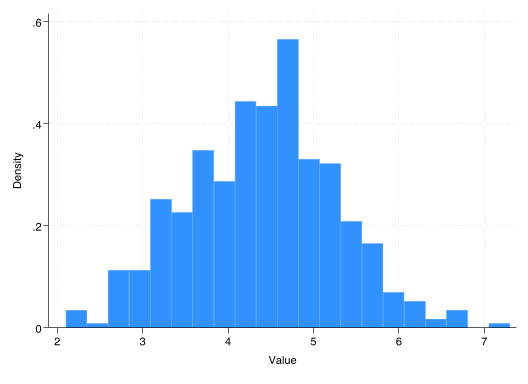

In [14]:
//looking at the distribution of asthma hospitalization rates
histogram value

In [10]:
//Setting up Data: Upload
// CDC ACS Census Data: Racial demographics of CA by county
import delimited using "/Users/emilyernst/Desktop/garden/soc_211_assignments/potentialdata/CDC_Queries/CENSUS-CA-Race/download (2)/data_204959.csv" , clear

(encoding automatically selected: ISO-8859-1)
(9 vars, 1,624 obs)


In [11]:
ds

statefips     countyfips    year          datacomment   raceethnic~y
state         county        value         v8


In [12]:
keep countyfips year raceethnicity value

In [13]:
tab raceethnicity


                         Race Ethnicity |      Freq.     Percent        Cum.
----------------------------------------+-----------------------------------
 All Non-White Races including Hispanic |        232       14.29       14.29
American Indian/Alaskan Native includ.. |        232       14.29       28.57
Asian/Pacific Islander including Hisp.. |        232       14.29       42.86
               Black including Hispanic |        232       14.29       57.14
                     Hispanic All Races |        232       14.29       71.43
               Other including Hispanic |        232       14.29       85.71
               White including Hispanic |        232       14.29      100.00
----------------------------------------+-----------------------------------
                                  Total |      1,624      100.00


In [14]:
encode raceethnicity, generate(race)

In [15]:
drop raceethnicity

In [16]:
tab race
tab race, nol


                         Race Ethnicity |      Freq.     Percent        Cum.
----------------------------------------+-----------------------------------
 All Non-White Races including Hispanic |        232       14.29       14.29
American Indian/Alaskan Native includin |        232       14.29       28.57
Asian/Pacific Islander including Hispan |        232       14.29       42.86
               Black including Hispanic |        232       14.29       57.14
                     Hispanic All Races |        232       14.29       71.43
               Other including Hispanic |        232       14.29       85.71
               White including Hispanic |        232       14.29      100.00
----------------------------------------+-----------------------------------
                                  Total |      1,624      100.00

       Race |
  Ethnicity |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |        232       14.29       14.29
  

In [17]:
drop if race!=7

(1,392 observations deleted)


In [18]:
egen poc_values = sum(values)

values not found
r(111);


In [32]:
order countyfips year
sort countyfips year

In [33]:
tab countyfips
tab year


 CountyFIPS |      Freq.     Percent        Cum.
------------+-----------------------------------
       6001 |         24        1.72        1.72
       6003 |         24        1.72        3.45
       6005 |         24        1.72        5.17
       6007 |         24        1.72        6.90
       6009 |         24        1.72        8.62
       6011 |         24        1.72       10.34
       6013 |         24        1.72       12.07
       6015 |         24        1.72       13.79
       6017 |         24        1.72       15.52
       6019 |         24        1.72       17.24
       6021 |         24        1.72       18.97
       6023 |         24        1.72       20.69
       6025 |         24        1.72       22.41
       6027 |         24        1.72       24.14
       6029 |         24        1.72       25.86
       6031 |         24        1.72       27.59
       6033 |         24        1.72       29.31
       6035 |         24        1.72       31.03
       6037 |      

In [34]:
quietly by countyfips year: gen dup= cond(_N==1,0,_n)

In [35]:
drop if dup>1

(1,160 observations deleted)


In [36]:
drop dup
drop race

In [37]:
rename value white_values

In [ ]:
** drop value

In [24]:
destring year, replace
destring countyfips, replace

year already numeric; no replace
countyfips already numeric; no replace


In [25]:
save race_white.dta, replace

file race_white.dta saved


In [26]:
//never do merge m:m!!!!!!
//can do 1:m m:1 but never m:m
merge m:1 countyfips year using asthma.dta, force

variables countyfips year do not uniquely identify observations in the using
    data
r(459);


In [ ]:
ds

In [ ]:
tab raceethnicity

In [ ]:
// Turning dependent variable into dummy/dichotomous variable
tab raceethnicity
tab raceethnicity, nol

gen white=raceethnicity


In [ ]:
// Labeling dependent variable

label variable democrat "Identifies as Democrat"
label define democrat 0 "Not Democrat" 1 "Democrat"
label values democrat democrat

In [ ]:
// Taking a quick look at my independent variables
tab sex
tab race
tab rincome
tab polviews

In [ ]:
// Cleaning up political ideology variable

tab polviews, nol
gen liberal=polviews

replace liberal=1 if polviews==1 | polviews==2 | polviews==3
replace liberal=0 if liberal!=1

tab liberal

In [ ]:
// Labeling political ideology variable

label variable liberal "Identifies as Liberal"
label define liberal 0 "Not Liberal" 1 "Liberal"
label values liberal liberal

In [ ]:
// Creating a dummy for people of color
tab race, nol

gen poc=.

replace poc=1 if race==2 | race==3
replace poc=0 if race==1

tab poc

In [ ]:
// Labeling race variable

label variable poc "Identifies as Person of Color (PoC)"
label define poc 0 "Not PoC" 1 "PoC"
label values poc poc

In [ ]:
// Creating a dummy for women
tab sex, nol

gen female=1 if sex==2
replace female=0 if sex==1

tab female

In [ ]:
// Labeling sex variable

label variable female "Identifies as Woman"
label define female 0 "Not Woman" 1 "Woman"
label values female female

### 1. Develop hypotheses that approach a nominal variable in your dataset as a dependent variable (DV). [1 pt]

* If your nominal variable has more than two categorical variables, such as political party affiliation categories of -- Democrat, Democratic Socialist, Green, Independent, or Republican -- develop hypotheses that treat being or not being in at least one of the categories as a dichotomous binomial dependent variable (DV).

* Even if you are not interested in any categorical outcomes for your research project, still develop an hypothesis for at least one nominal variable in your data as a dependent variable. Thinking about potential influences on that variable could help you see if there are intervening relationships or omitted variable biases in your primary outcome of interest.

Do the following when you write your hypothesis:

    A. Write a separate hypothesis for each dependent variable (DV) you want to analyze.
    
    ---
    Anh's Example: I hypothesize that being a person of color, being female, having higher income, and being more liberal predicts identification with the Democratic party.
    ---
    
    B. For each dependent variable (DV) state the predicted direction of association between your dependent variable DV and independent variables (IVs) in your model. You can predict no relationship if you do not expect a relationship.
    
    ---
    Anh's Example: The relationship between income and Democratic party identification is negative. People of color, women, and liberals have higher odds of identifying with the Democratic party.
    ---
    
    C. Write a couple sentences about the theoretical reasons (prior knowledge / research) for each of your predictions
    
    ---
    Anh's Note: Refer back to either literature or to just your intuition. Either is fine.
    ---

### 2. Test your hypotheses [3 pts]

    A. Create a frequency table for your dependent variable (DV).

    B. Estimate an OLS model regressing your dichotomous dependent variable (DV) on your hypothesized independent variables (IVs) and store the results.
    
    C. Estimate an MLE logistic model regressing your dichotomous dependent variable (DV) on your hypothesized independent variables (IVs) and store the results.
    
    D. Use esttab to output the coefficients for your OLS and MLE logistic models with html formatting within your Jupyter Notebook.
    
    E. Use esttab to reoutput your coefficients as odd ratios.

In [ ]:
*** PART A: Creating frequency table for dependent variable

tab democrat

In [ ]:
// Clearing stored estimates

est clear

In [ ]:
*** PART B: Estimating an OLS model and storing results
// Use "ro", short for robust, to get robust standard errors

eststo: reg democrat i.poc i.female i.liberal rincome, ro

In [ ]:
*** PART C: Estimating an MLE logistic model and storing results
// Use "ro" again to get robust standard errors

eststo: logit democrat i.poc i.female i.liberal rincome, ro
eststo: margins, dydx(*) post atmeans

In [ ]:
*** PART D: Outputting Table Results

esttab ///
, cells(b(star fmt(2)) se(fmt(2) par)) stardetach  ///
	legend starlevels(^ .1 * .05 ** .01 *** .001) ///
mlabels("OLS" "MLE / logistic" "MLE marginal effects") title("Unexpontiated Coefficients") ///
collabels(none) keep(1.poc 1.female 1.liberal rincome _cons)

In [ ]:
*** PART E: Outputting Table Results with Odds Ratio
// Do this by using "eform"

esttab ///
, cells(b(star fmt(2)) se(fmt(2) par)) stardetach  ///
	legend starlevels(^ .1 * .05 ** .01 *** .001) ///
mlabels("OLS" "MLE / logistic" "MLE marginal effects") title("Odds Ratio") ///
collabels(none) keep(1.poc 1.female 1.liberal rincome _cons) eform

### 3. Interpret your results [1 pt]

Write a couple sentences answering each of the following questions:

    A. How would you interpret the relationship between your dependent variable(s) (DVs) and independent variables (IVs) based on the odds ratios for you MLE logistic model?

    B. Do the overall estimates support or contradict your hypotheses? Why?
    
    C. Is there anything suprising in your model estimates? Why?
    
    D. How do the OLS coefficients and their standard errors compare to the MLE estimates? Are the coefficients and standard errors larger or smaller?

#### Part A: Interpreting Relationship

Feel free to use the following format for your assignment.
* For these interpretations, I am looking specifically at the odds ratio table and looking at the marginal effects column with regards to the MLE model. For odds ratios that are greater than 1 (which are positive odds ratios), you can substract the value by one and interpret it as a positive percent. For odds ratios less than 1 (which are negative odds ratios), you can also substract the value by one and interpret the value as a negative percent. 

Interpreting for nominal or dichotomous independent variables:
* Anh's example: The odds of identifying as Democrat is 7% more for people of color compared to white people. The odds of identifying as Democrat is 4% more for women compared to men. The odds of identifying as Democrat is 8% more for liberals compared to people who do not consider themselves to be liberal.

Interpreting for interval-ratio or continuous independent variables:
* Anh's example: For every one unit increase in respondent's income, there is a 0% increase in the odds of identifying as a Democrat. (This happens sometimes with results, where you get a statistically significant result but the odds ratio is 1.00 (or the coefficient is 0.00). A result like this indicates that the predictor/independent variable has either no effect or a very small/negligible effect on the outcome/dependent variable.)

When interpreting the unexponentiated coefficients, you would say something like "The log odds for being a person of color and identifying as a Democrat is 0.07."
* As Charlie implied during lecture, unexponentiated coefficients are hard to interpret. It is not intuitive for most people to look at that and understand what log odds is. That is why we transform the unexponentiated coefficients into odds ratios.

#### Part B: Comparing Results to Hypothesis

Refer back to the directions/general results you expected to find.
* Anh's example: The results provide some supporting evidence for my hypothesis. I expected to find that women, people of color, and liberals have higher odds of identifying as Democrats, and my findings support my predictions. Surprisingly however, there appears to be no relationship between income and identification with the Democratic party.

#### Part C: Surprising Findings

Part C is asking about which results are surprising based on intuition or what you know about the literature.
* Anh's example: I am surprised to see that income seemingly has no effect on party identification as a Democrat. Past research suggests that richer people tend to be Republicans rather than Democrats, but my result implies that this relationship may not be straightforward (as in income may not be the sole or even an important factor in party identification).

* NOTE: You may not have to answer this part of the question if the results support the predictions in Q1.

#### Part D: OLS VS MLE Results

Focus on magnitude, direction, and standard errors of the unexponentiated coefficients between the OLS and MLE marginal effects columns. If there are differences, state what is different (no need to explain why- if there is a difference, there is simply a difference).
* Anh's example: The magnitude, direction, and standard errors of my findings are comparable between the OLS and MLE models. There appears to be virtually no difference in the results.

### Notes from Anh

#### IMPORTANT: You don't have to include this following section in your assignment. This is just for your information.

#### What is maximum likelihood estimation (MLE)?

Maximum likelihood estimation involves finding "parameters that maximizes the likelihood of observing the sample data" (Treiman 2009:302). This process is what Charlie was trying to show us in class on the Excel sheet. You do not have to understand exactly how the math behind MLE is occurring; just remember that the process for generating results behind MLE is different than it is for OLS.
* Remember- likelihood is different than probability. With MLE, you are examining "the likelihood of the parameters μ and σ taking certain values given that we’ve observed a bunch of data" versus with OLS which has you examining "the probability density of observing the data with model parameters μ and σ" (reference this link for more information: https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1).

MLE comes with its own assumptions, similar to the assumptions of linear models which focus on minimizing the error of the sum of squares (OLS = ordinary least squares).

Assumptions of MLE:
1. Independence of errors: The observations are not related to one another.
2. Absence of multicollinearity: The independent variables are not highly correlated with one another.
    * Use the "vif" command in Stata to calculate the variance inflation scores and test for multicollinearity. 
    
3. Linearity in relationship between independent variables and log odds (aka the logit of the dependent variable): 
    * This assumption comes from the use of the following function in MLE:
    $Logit(p) = log\frac{p}{1-p}$
    
4. No extreme outliers: A large/adequate sample size is needed to accurately run MLE so that the outliers you have are not numerous or influential for the overall results.

#### Why do we calculate the marginal effects (specifically marginal odds ratios) for logistic regression?

We calculate the marginal effects of our logistic regression results so that we can compare coefficients/results across different models. When we get the marginal odds ratios for logistic regression, we are accounting for how the odds ratio (calculated without marginal effects) changes depending on all the independent variables that are included in a particular model.

Read more on this here: https://sociologicalscience.com/download/vol_10/april/SocSci_v10_332to347.pdf 

#### Linear Probability Model vs Logistic Regression Model Debate

Treiman (P. 302): "Although as we have seen, OLS regression procedures can easily handle categorical independent  variables, they are not appropriate for categorical dependent variables, even dichotomies. In the case of dichotomous dependent variables, the assumptions of multiple regression, including in particular that errors of prediction are normally distributed, break down badly, often yielding seriously misleading results; moreover, predicted values often lie outside the logically possible range (zero to one)."
* To clarify, the biggest concern with the linear probability model (aka doing OLS regression for binary dependent variables) is that the results you receive may fall outside of the 0 - 1 spectrum, making the findings uninterpretable.

#### Quick Note on probit models

Probit models, also used in lieu of OLS when the dependent variable is dichotomous, provide comparable results that you will see when doing logistic regression. Probit models are not common in sociology (most sociologists use logistic regression for binary dependent variables).
* Probit models use the cumulative distribution function rather than maximum likelihood estimation. You would also calculate marginal effects for the coefficients of probit models when interpreting findings.
* Read more on doing probit models in Stata here: https://blog.stata.com/2016/01/07/probit-or-logit-ladies-and-gentlemen-pick-your-weapon/